## Import libraries and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set plotting style
PRIMARY_COLOR = '#2E86AB'
SECONDARY_COLOR = '#A23B72'
ACCENT_COLOR = '#F18F01'
SUCCESS_COLOR = '#C73E1D'
NEUTRAL_COLOR = '#6C757D'
LIGHT_COLOR = '#E9ECEF'

COLOR_PALETTE = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6C757D',
                '#28A745', '#17A2B8', '#FFC107', '#DC3545', '#6F42C1']

sns.set_style("whitegrid")
sns.set_palette(COLOR_PALETTE)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

## Data representation and loading

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
26883,Resort Hotel,0,45,2016,August,33,11,0,3,2,...,No Deposit,240.0,NaN,0,Transient,213.0,0,1,Check-Out,2016-08-14
60169,City Hotel,1,277,2016,November,46,7,1,2,2,...,Non Refund,NaN,NaN,0,Transient,100.0,0,0,Canceled,2016-04-04
84343,City Hotel,0,12,2016,February,8,20,2,2,2,...,No Deposit,28.0,NaN,0,Transient,100.0,0,1,Check-Out,2016-02-24
14993,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,Non Refund,NaN,NaN,0,Transient,121.5,0,0,Canceled,2015-04-28
15500,Resort Hotel,0,48,2015,July,30,20,1,2,2,...,No Deposit,142.0,NaN,0,Transient,118.0,0,0,Check-Out,2015-07-23


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (119390, 32)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [10]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [11]:
df.nunique()

,0
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14


## Check null values and missing data analysis

In [12]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [13]:
missing_data = pd.DataFrame({'Column': df.columns,'Missing Count': df.isnull().sum()})
missing_data = missing_data[missing_data['Missing Count'] > 0]

In [14]:
missing_data

,Column,Missing Count
children,children,4
country,country,488
agent,agent,16340
company,company,112593


<Figure size 1500x1000 with 0 Axes>

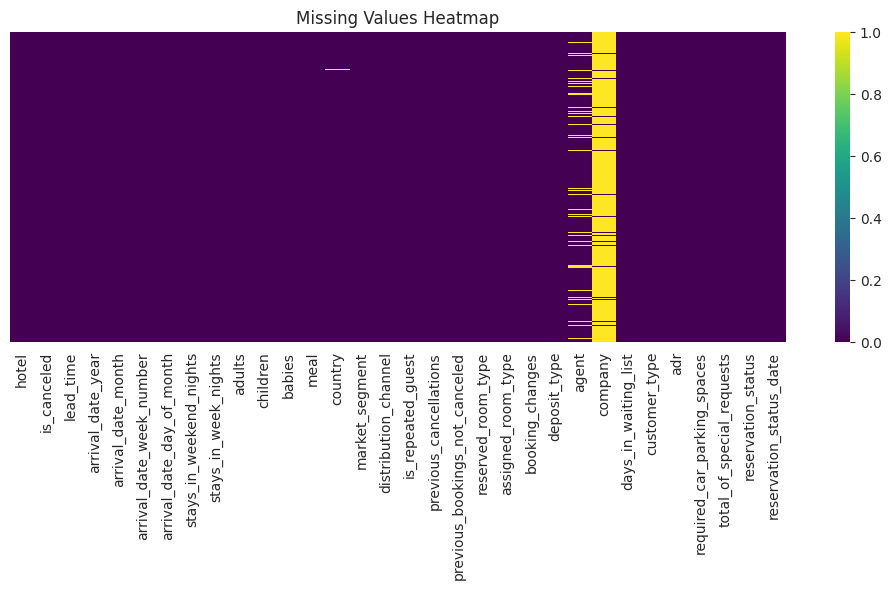

In [15]:
plt.figure(figsize=(15, 10))
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [16]:
df['children'].fillna(df['children'].mode()[0], inplace=True)

In [17]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [18]:
df['agent'].fillna(0, inplace=True)
df['agent'] = df['agent'].astype(int)

In [19]:
df['company'].fillna(0, inplace=True)
df['company'] = df['company'].astype(int)

### Check

In [20]:
df.isnull().sum().sum()

np.int64(0)

<Figure size 1500x1000 with 0 Axes>

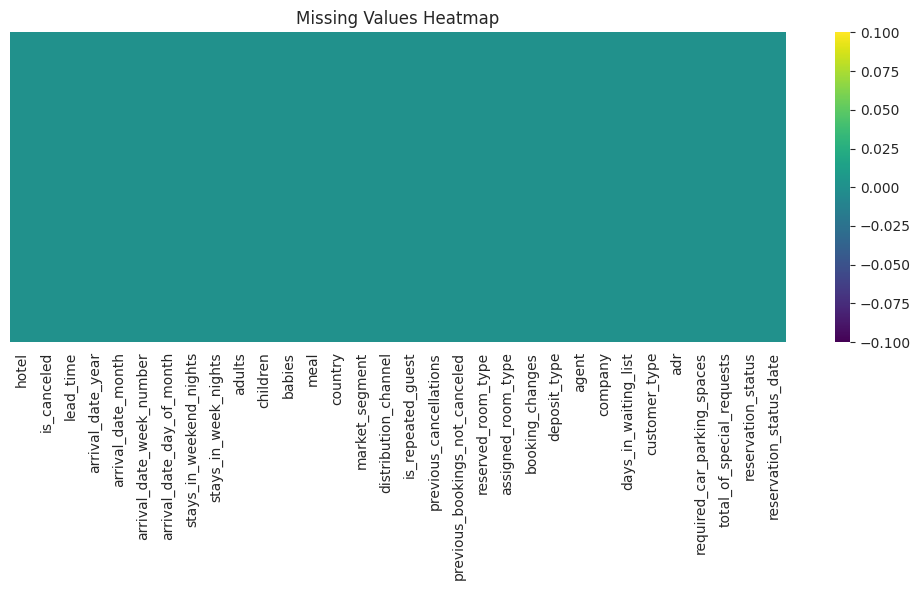

In [21]:
plt.figure(figsize=(15, 10))
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

## Check duplicate records

In [22]:
df.duplicated().sum()

np.int64(32013)

In [23]:
print(f"New dataset shape: {df.shape}")

New dataset shape: (119390, 32)


In [24]:
df.drop_duplicates(inplace=True)

In [25]:
print(f"New dataset shape: {df.shape}")

New dataset shape: (87377, 32)


## Check outliers using statistical methods

In [26]:
numerical_columns = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'adults', 'children', 'babies', 'previous_cancellations',
                    'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'required_car_parking_spaces',
                    'total_of_special_requests']
existing_numerical_columns = [col for col in numerical_columns if col in df.columns]

In [27]:
outlier_summary = []

for col in existing_numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary.append({
        'Column': col,
        'Outliers_Count': len(outliers),
        'Outliers_Percentage': (len(outliers) / len(df)) * 100,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Min_Value': df[col].min(),
        'Max_Value': df[col].max()
    })

outlier_df = pd.DataFrame(outlier_summary)

In [28]:
outlier_df

,Column,Outliers_Count,Outliers_Percentage,Lower_Bound,Upper_Bound,Min_Value,Max_Value
0,lead_time,2396,2.742140,-160.0,296.0,0.00,737.0
1,adr,2488,2.847431,-21.0,227.0,-6.38,5400.0
2,stays_in_weekend_nights,220,0.251783,-3.0,5.0,0.00,19.0
3,stays_in_week_nights,1531,1.752177,-3.5,8.5,0.00,50.0
4,adults,22887,26.193392,2.0,2.0,0.00,55.0
5,children,8364,9.572313,0.0,0.0,0.00,10.0
6,babies,914,1.046042,0.0,0.0,0.00,10.0
7,previous_cancellations,1685,1.928425,0.0,0.0,0.00,26.0
8,previous_bookings_not_canceled,3545,4.057132,0.0,0.0,0.00,72.0
9,booking_changes,15901,18.198153,0.0,0.0,0.00,21.0


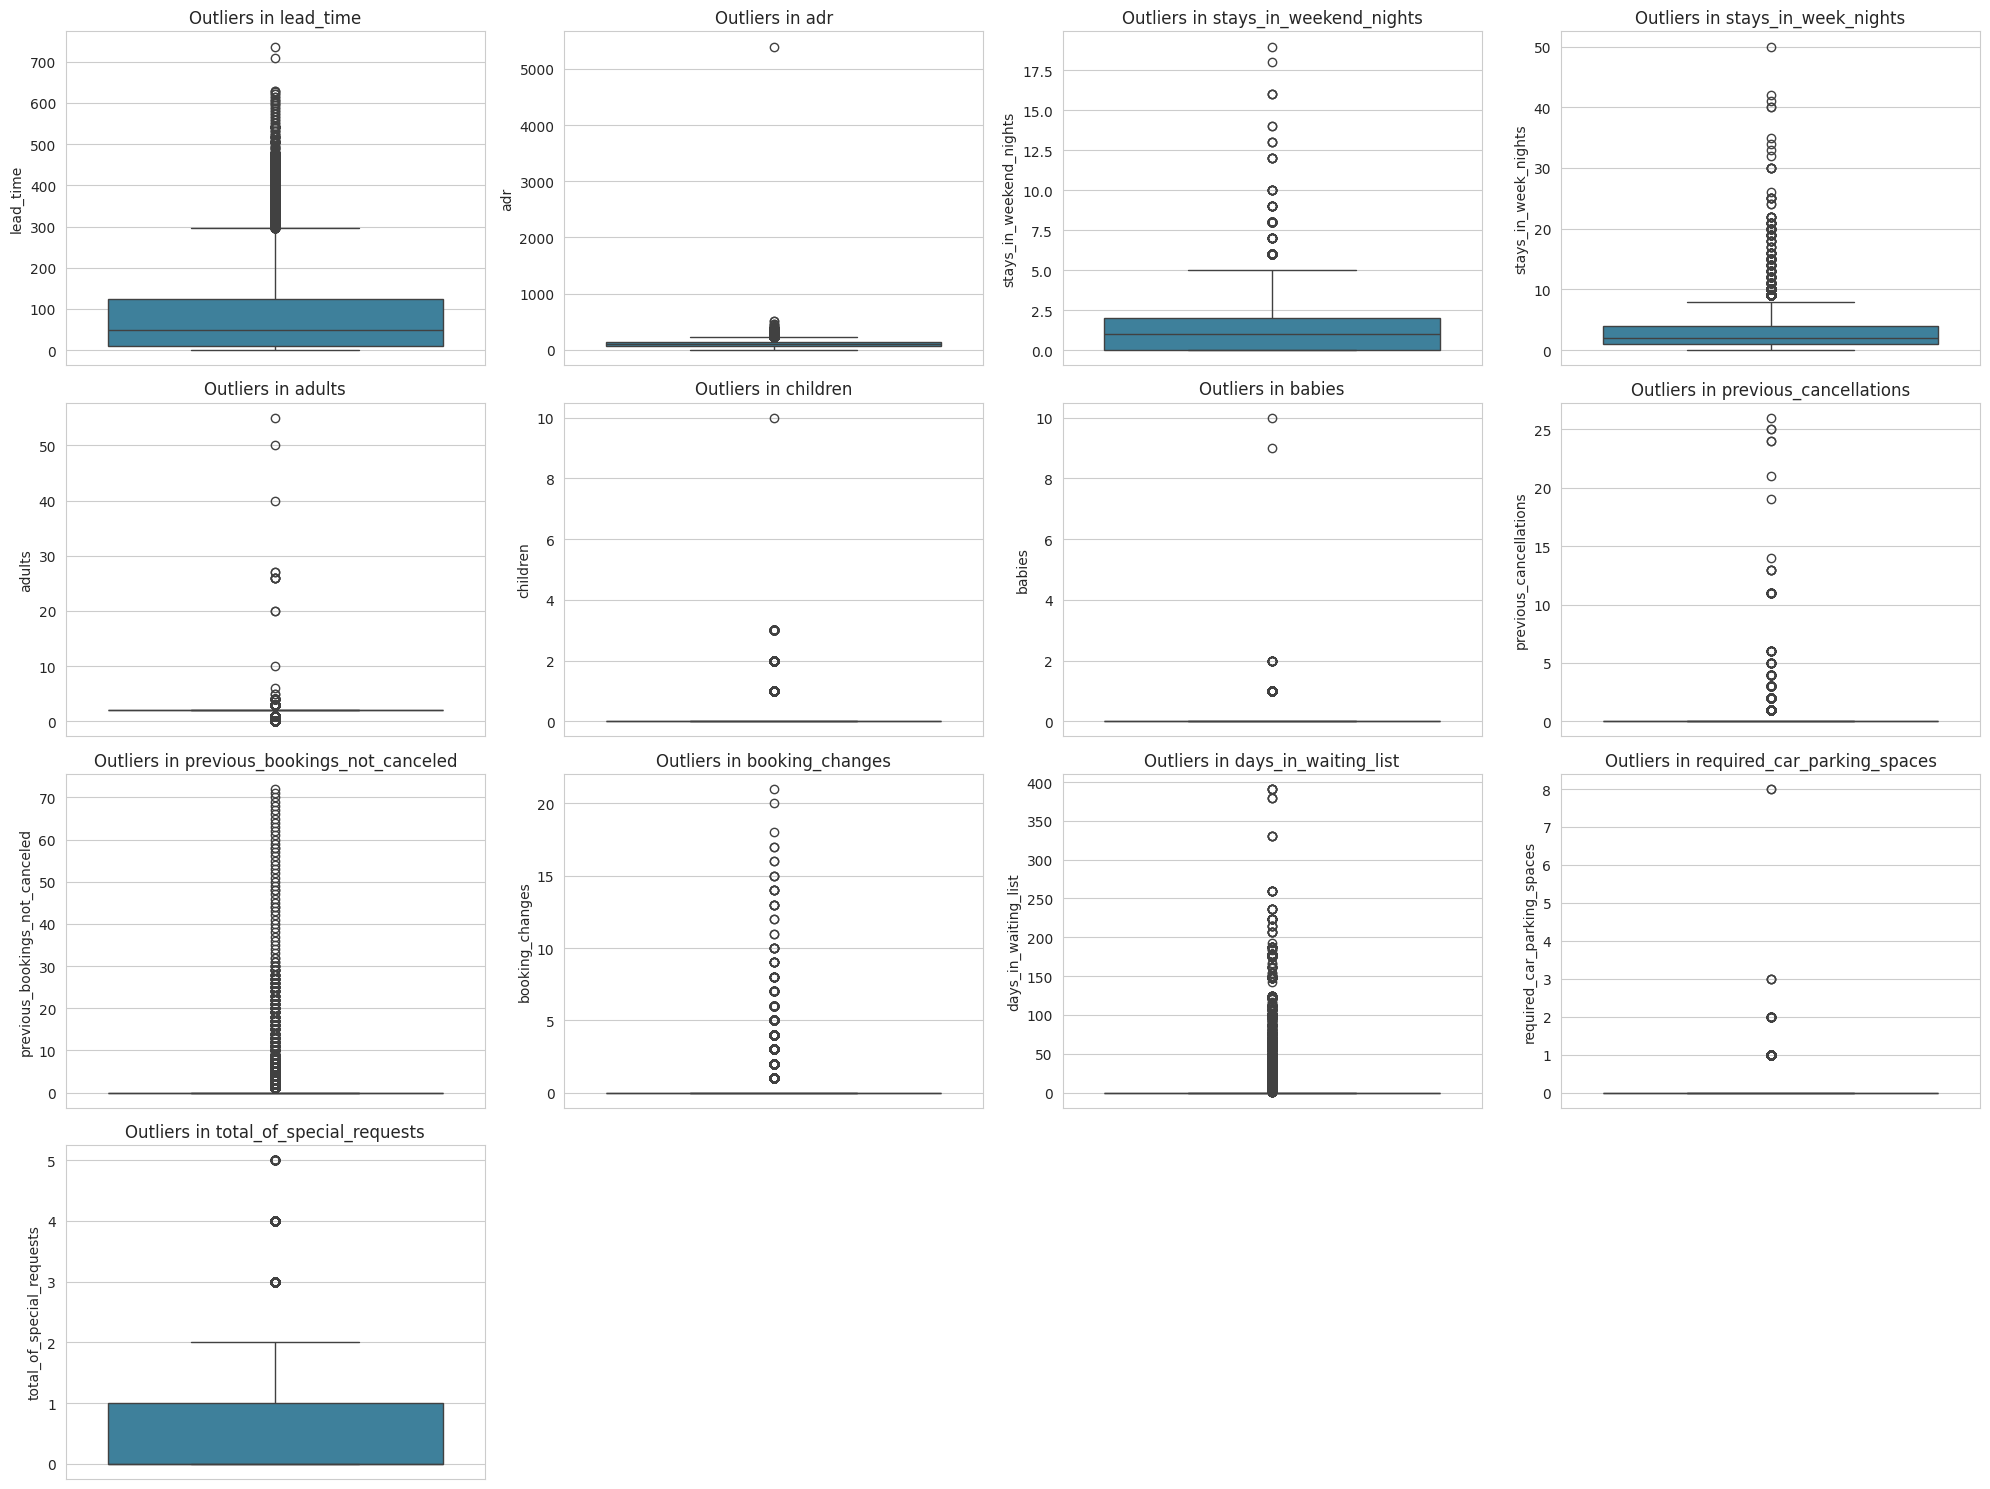

In [29]:
plt.figure(figsize=(20, 15))
n_cols = 4
n_rows = (len(existing_numerical_columns) + n_cols - 1) // n_cols

for i, col in enumerate(existing_numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [30]:
df = df[df['adr'] >= 0]
df = df[df['stays_in_weekend_nights'] >= 0]
df = df[df['stays_in_week_nights'] >= 0]

In [31]:
df.loc[df['adr'] > 1000, 'adr'] = 1000

In [32]:
print("ADR Min/Max:", df['adr'].min(), df['adr'].max())
print("Weekend Nights Min:", df['stays_in_weekend_nights'].min())
print("Week Nights Min:", df['stays_in_week_nights'].min())

ADR Min/Max: 0.0 1000.0
Weekend Nights Min: 0
Week Nights Min: 0


## Fix data types and date formatting

In [33]:
df['arrival_date_month_num'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

In [34]:
df['arrival_date'] = pd.to_datetime(dict(
    year=df['arrival_date_year'],
    month=df['arrival_date_month_num'],
    day=df['arrival_date_day_of_month']
))

In [35]:
df.drop(columns=['arrival_date_month_num'], inplace=True)

print(df[['arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date']].head())

   arrival_date_year arrival_date_month  arrival_date_day_of_month  \
0               2015               July                          1   
1               2015               July                          1   
2               2015               July                          1   
3               2015               July                          1   
4               2015               July                          1   

  arrival_date  
0   2015-07-01  
1   2015-07-01  
2   2015-07-01  
3   2015-07-01  
4   2015-07-01  


In [36]:
boolean_columns = ['is_canceled', 'is_repeated_guest']
for col in boolean_columns:
    if col in df.columns:
        df[col] = df[col].astype(int)
        print(f"{col}: Converted to integer (0/1)")

is_canceled: Converted to integer (0/1)
is_repeated_guest: Converted to integer (0/1)


## Exploratory data analysis (EDA)

### Booking Status Analysis

In [37]:
cancellation_counts = df['is_canceled'].value_counts()
cancellation_rate = (cancellation_counts[1] / len(df)) * 100
cancellation_rate

np.float64(27.494964292254163)

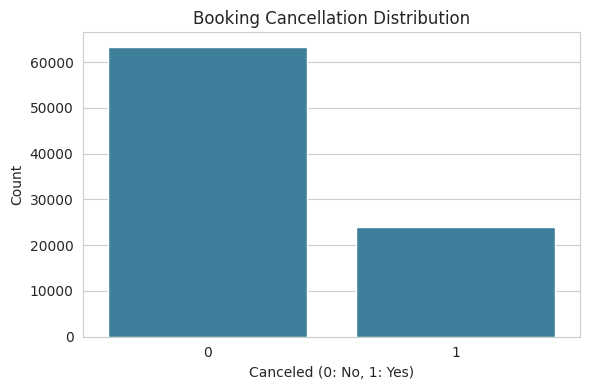

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_canceled')
plt.title('Booking Cancellation Distribution')
plt.xlabel('Canceled (0: No, 1: Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

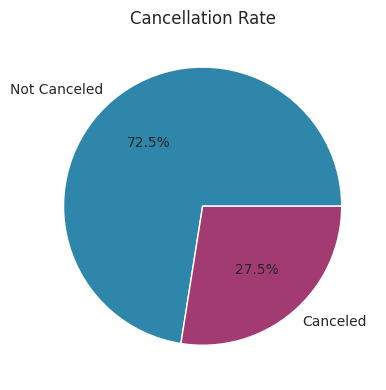

In [39]:
plt.figure(figsize=(6, 4))
df['is_canceled'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Not Canceled', 'Canceled'],
    colors=['#2E86AB', '#A23B72']
)
plt.title('Cancellation Rate')
plt.ylabel('')
plt.tight_layout()
plt.show()


### Hotel Type Analysis

In [40]:
hotel_counts = df['hotel'].value_counts()
hotel_counts

,count
hotel,
City Hotel,53428
Resort Hotel,33948


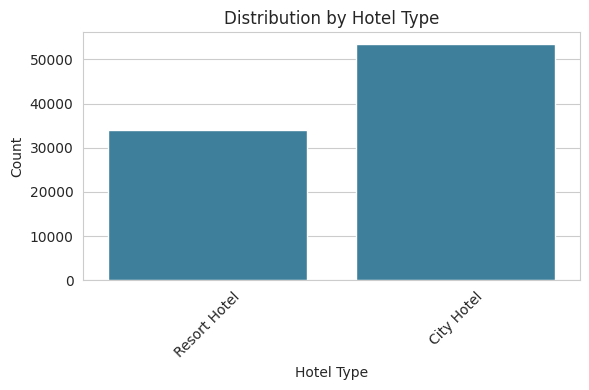

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hotel')
plt.title('Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

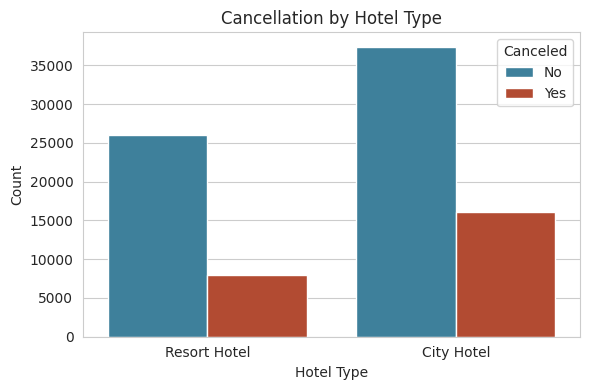

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hotel', hue='is_canceled', palette=['#2E86AB', '#C73E1D'])
plt.title('Cancellation by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

### Temporal Analysis

In [44]:
monthly_bookings = df['arrival_date_month'].value_counts()
monthly_bookings

,count
arrival_date_month,
August,11257
July,10056
May,8355
April,7905
June,7765
March,7509
October,6932
September,6690
February,6092


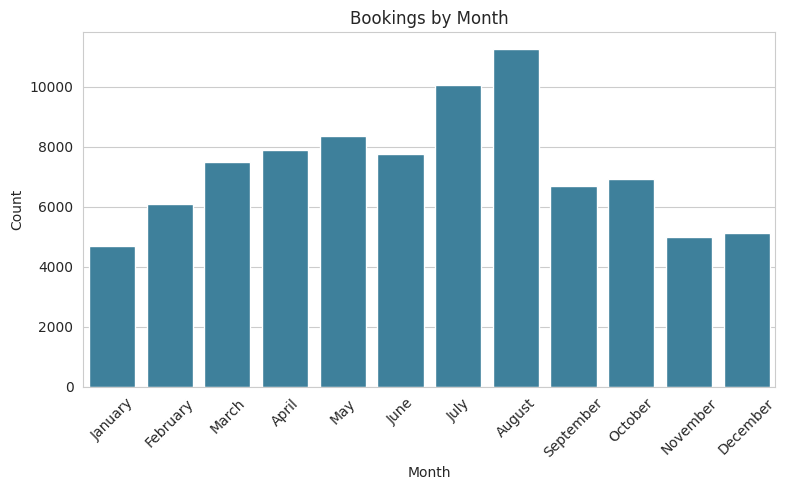

In [45]:
plt.figure(figsize=(8, 5))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=df, x='arrival_date_month', order=month_order)
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

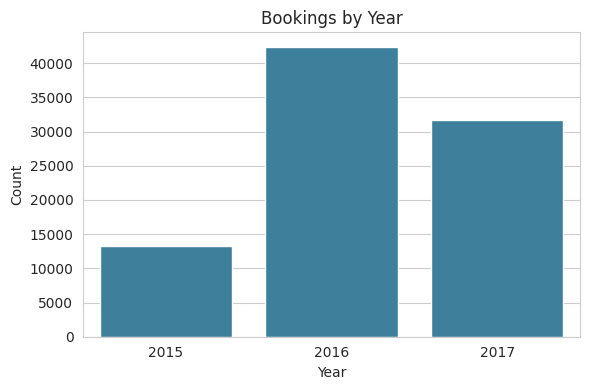

In [46]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='arrival_date_year')
plt.title('Bookings by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

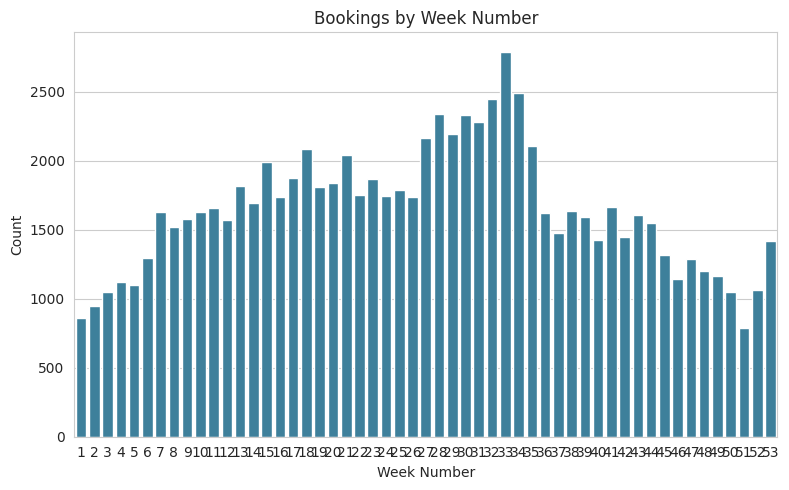

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='arrival_date_week_number')
plt.title('Bookings by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

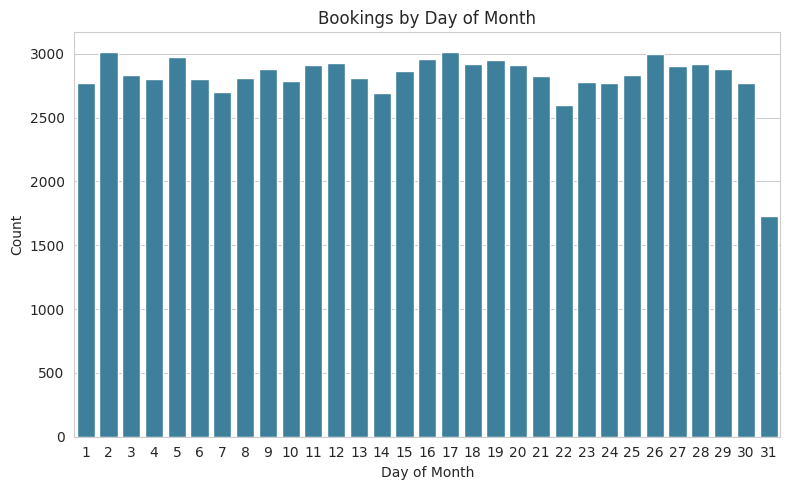

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='arrival_date_day_of_month')
plt.title('Bookings by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Guest Demographics Analysis

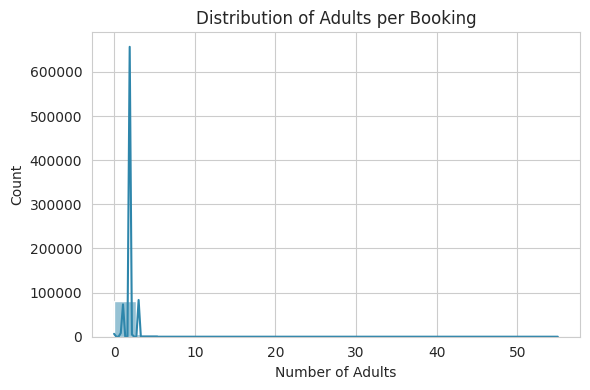

In [49]:
plt.figure(figsize=(6, 4))
sns.histplot(df['adults'], bins=20, kde=True)
plt.title('Distribution of Adults per Booking')
plt.xlabel('Number of Adults')
plt.tight_layout()
plt.show()

In [50]:
top_countries = df['country'].value_counts().head(10)
top_countries

,count
country,
PRT,27886
GBR,10432
FRA,8837
ESP,7252
DEU,5387
ITA,3066
IRL,3016
BEL,2081
BRA,1995


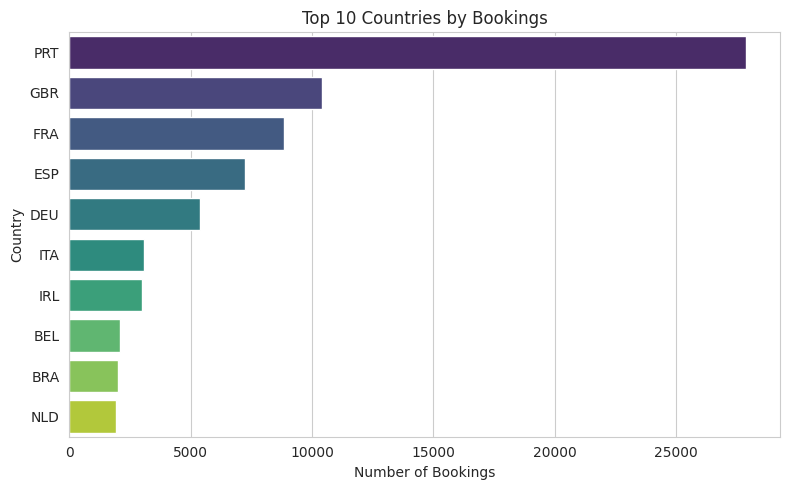

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Bookings')
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### Booking Behavior Analysis

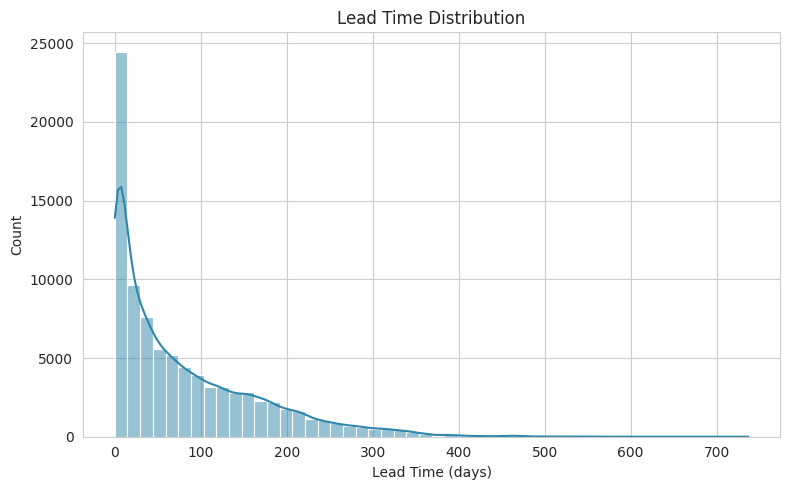

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.tight_layout()
plt.show()

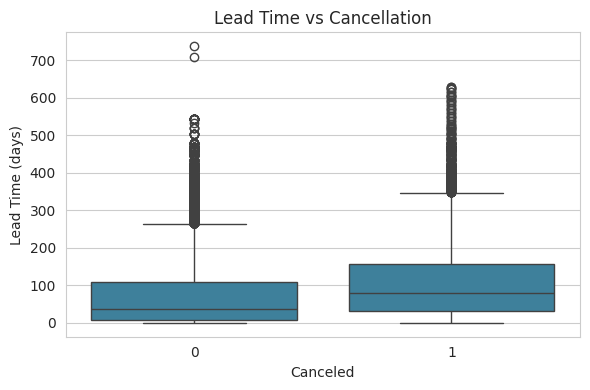

In [53]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Lead Time vs Cancellation')
plt.xlabel('Canceled')
plt.ylabel('Lead Time (days)')
plt.tight_layout()
plt.show()

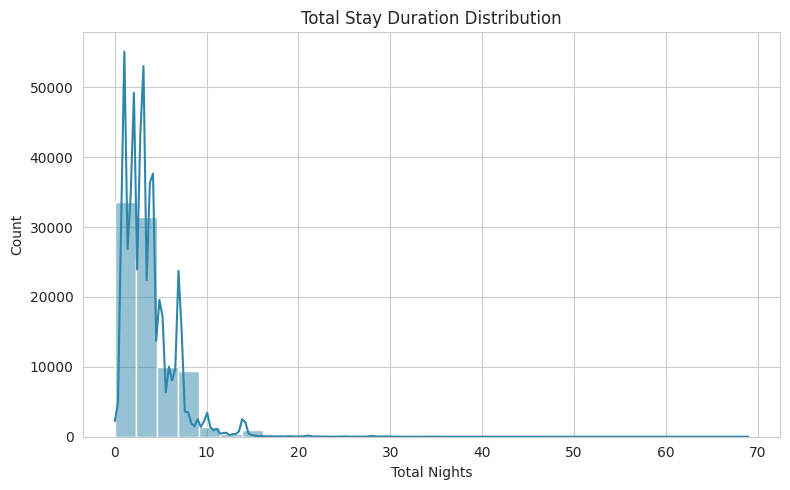

In [54]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

plt.figure(figsize=(8, 5))
sns.histplot(df['total_nights'], bins=30, kde=True)
plt.title('Total Stay Duration Distribution')
plt.xlabel('Total Nights')
plt.tight_layout()
plt.show()

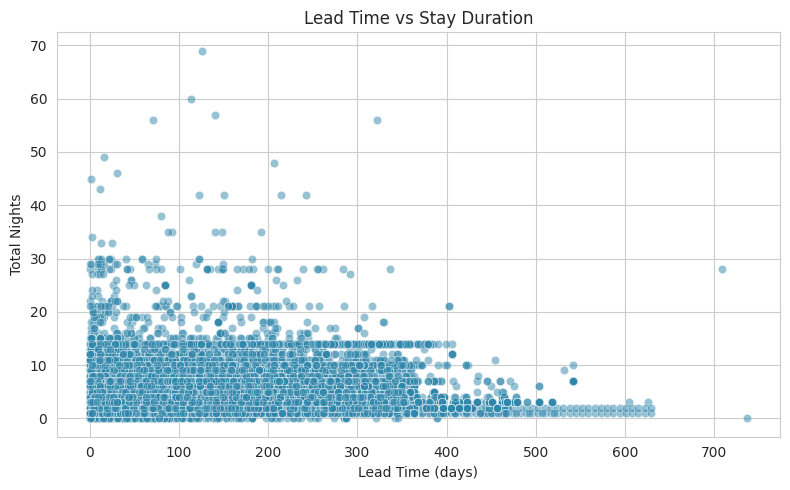

In [55]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='lead_time', y='total_nights', alpha=0.5)
plt.title('Lead Time vs Stay Duration')
plt.xlabel('Lead Time (days)')
plt.ylabel('Total Nights')
plt.tight_layout()
plt.show()

### Pricing Analysis (ADR)

In [56]:
adr_stats = df['adr'].describe()
adr_stats

,adr
count,87376.000000
mean,106.296044
std,52.094830
min,0.000000
25%,72.000000
50%,98.100000
75%,134.000000
max,1000.000000


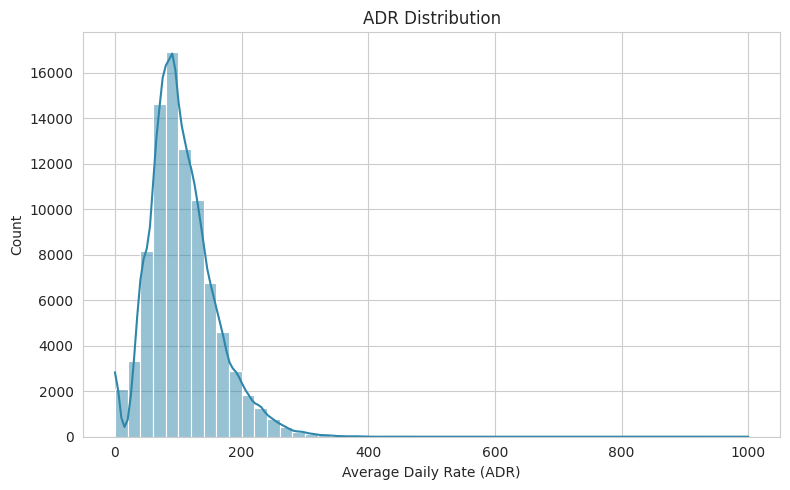

In [57]:
plt.figure(figsize=(8, 5))
sns.histplot(df['adr'], bins=50, kde=True)
plt.title('ADR Distribution')
plt.xlabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show()

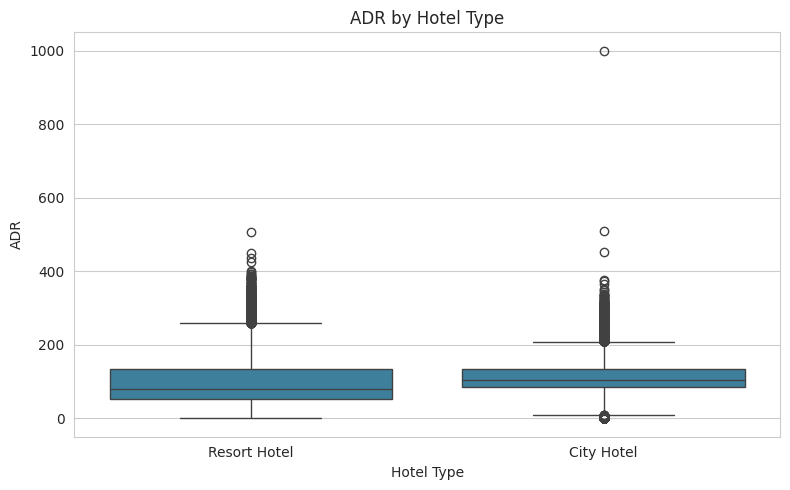

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='hotel', y='adr')
plt.title('ADR by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.tight_layout()
plt.show()

In [59]:
monthly_adr = df.groupby('arrival_date_month')['adr'].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_adr = monthly_adr.reindex(month_order)

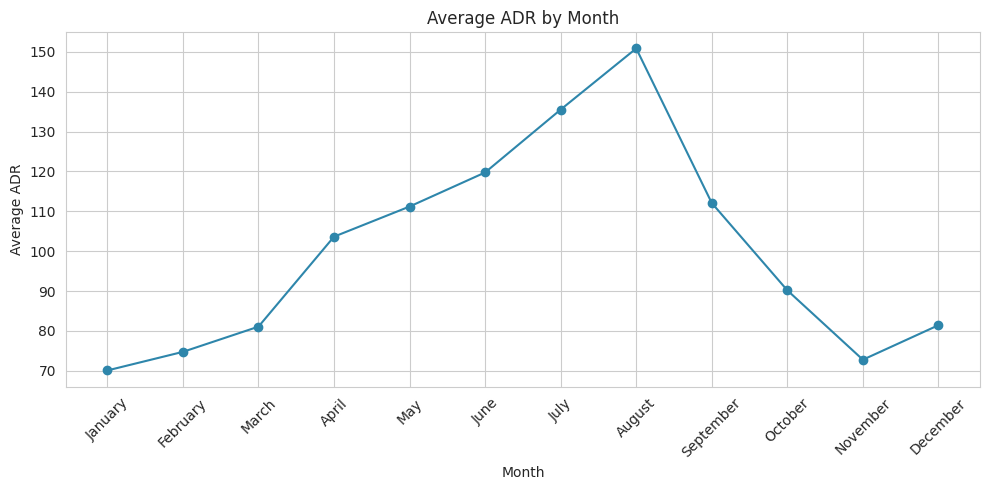

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(monthly_adr)), monthly_adr.values, marker='o')
plt.title('Average ADR by Month')
plt.xlabel('Month')
plt.ylabel('Average ADR')
plt.xticks(range(len(month_order)), month_order, rotation=45)
plt.tight_layout()
plt.show()

### Market Segment Analysis

In [61]:
market_segment_counts = df['market_segment'].value_counts()
market_segment_counts

,count
market_segment,
Online TA,51616
Offline TA/TO,13886
Direct,11798
Groups,4939
Corporate,4206
Complementary,702
Aviation,227
Undefined,2


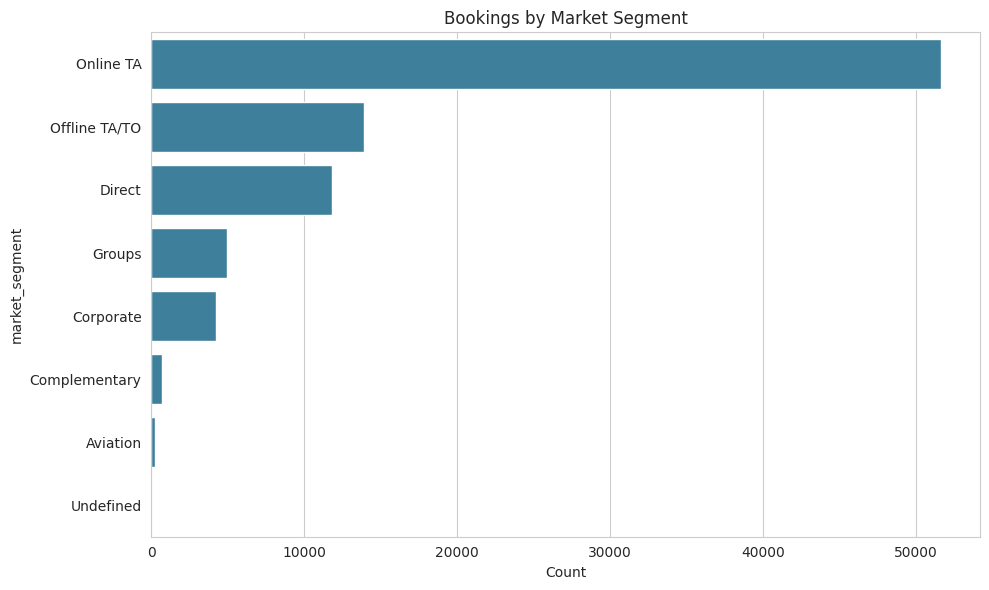

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='market_segment', order=market_segment_counts.index)
plt.title('Bookings by Market Segment')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

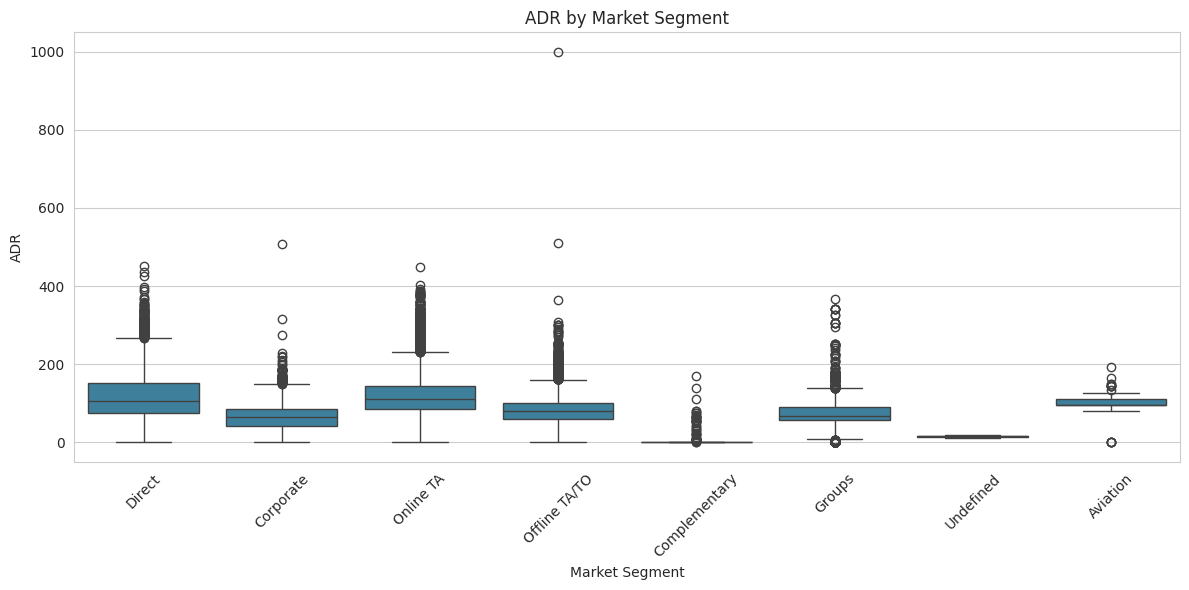

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='market_segment', y='adr')
plt.title('ADR by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

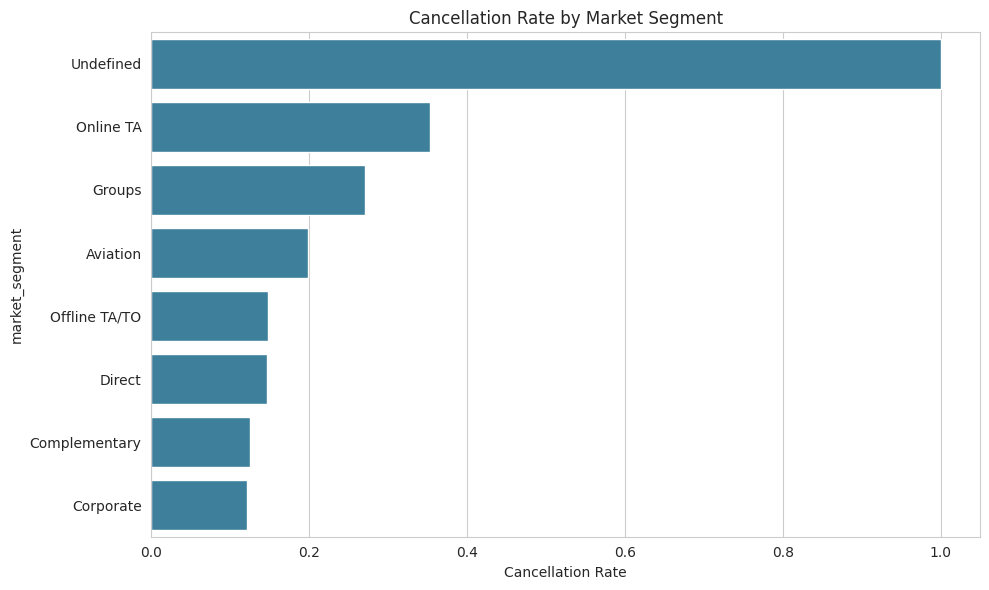

In [64]:
segment_cancellation = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_cancellation.values, y=segment_cancellation.index)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Cancellation Rate')
plt.tight_layout()
plt.show()

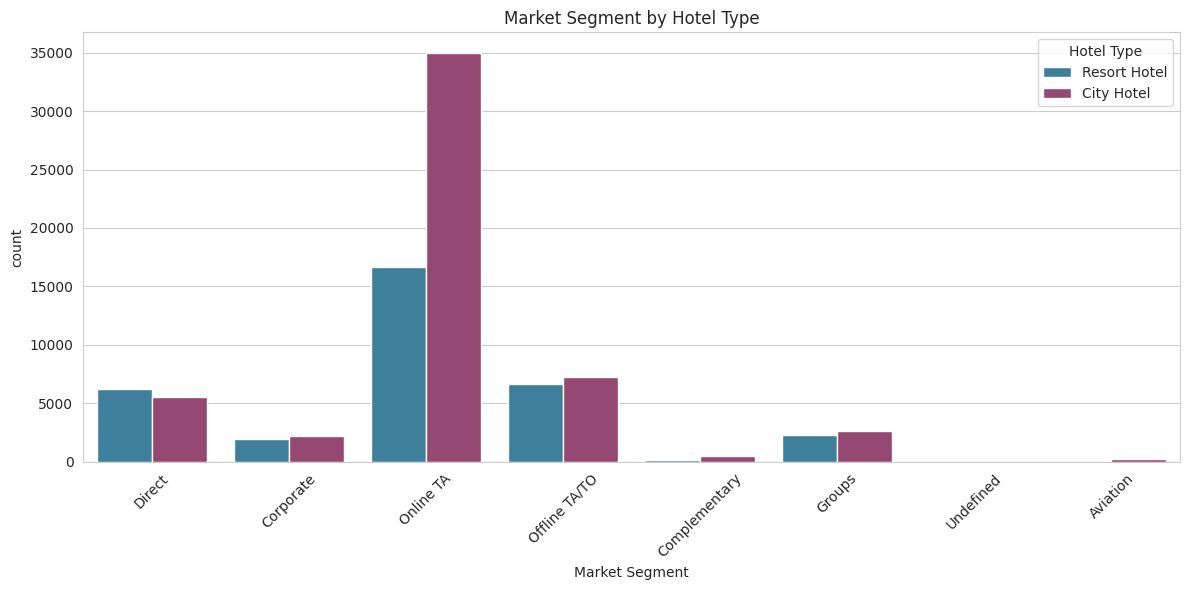

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='market_segment', hue='hotel')
plt.title('Market Segment by Hotel Type')
plt.xlabel('Market Segment')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

### Distribution Channel Analysis

In [66]:
channel_counts = df['distribution_channel'].value_counts()
channel_counts

,count
distribution_channel,
TA/TO,69136
Direct,12979
Corporate,5075
GDS,181
Undefined,5


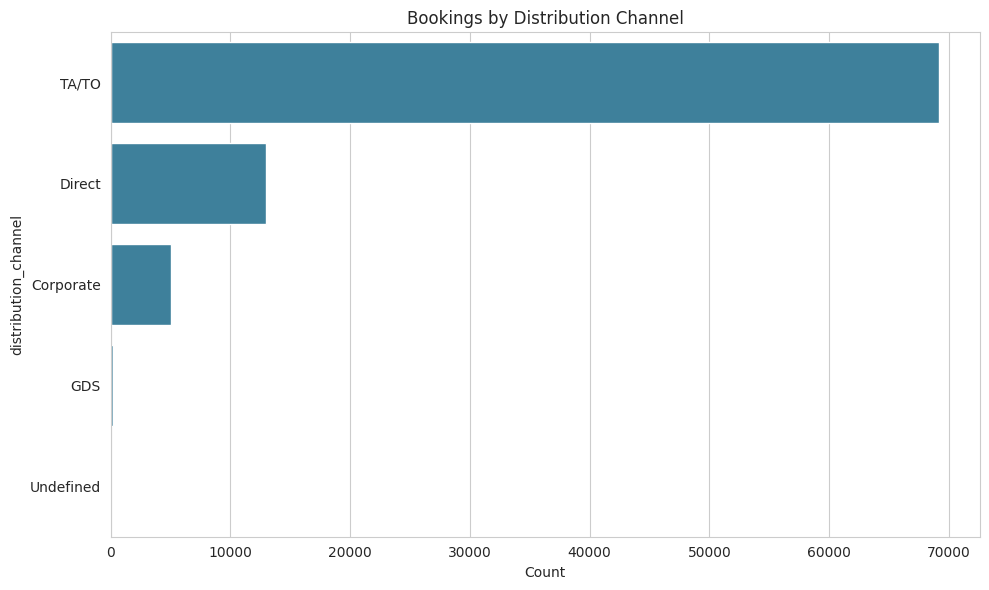

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='distribution_channel', order=channel_counts.index)
plt.title('Bookings by Distribution Channel')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

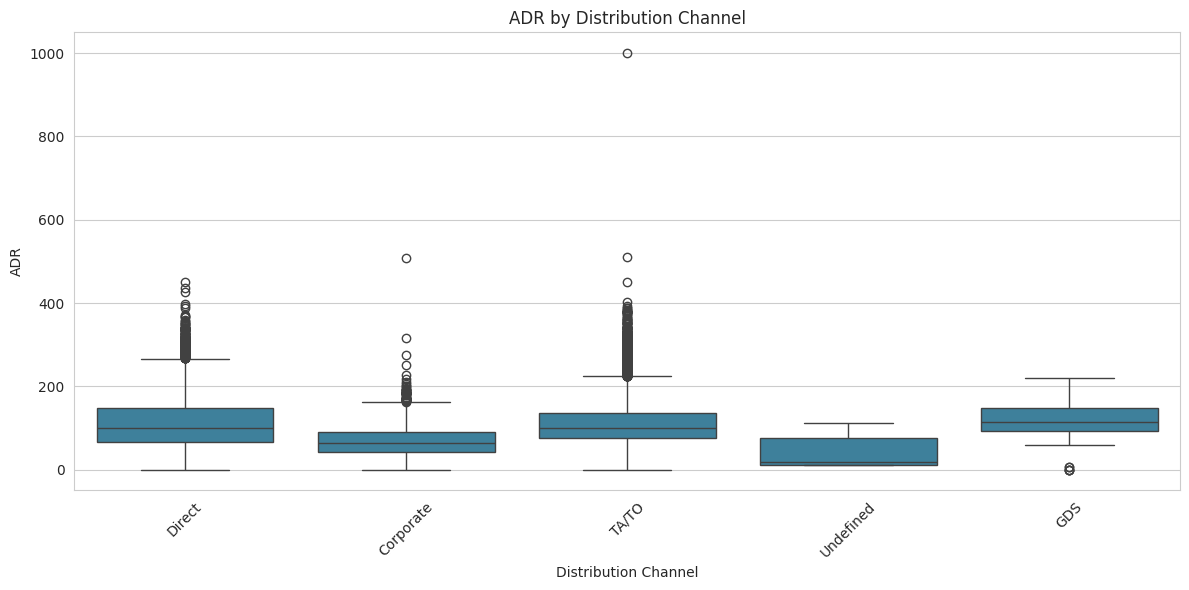

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='distribution_channel', y='adr')
plt.title('ADR by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

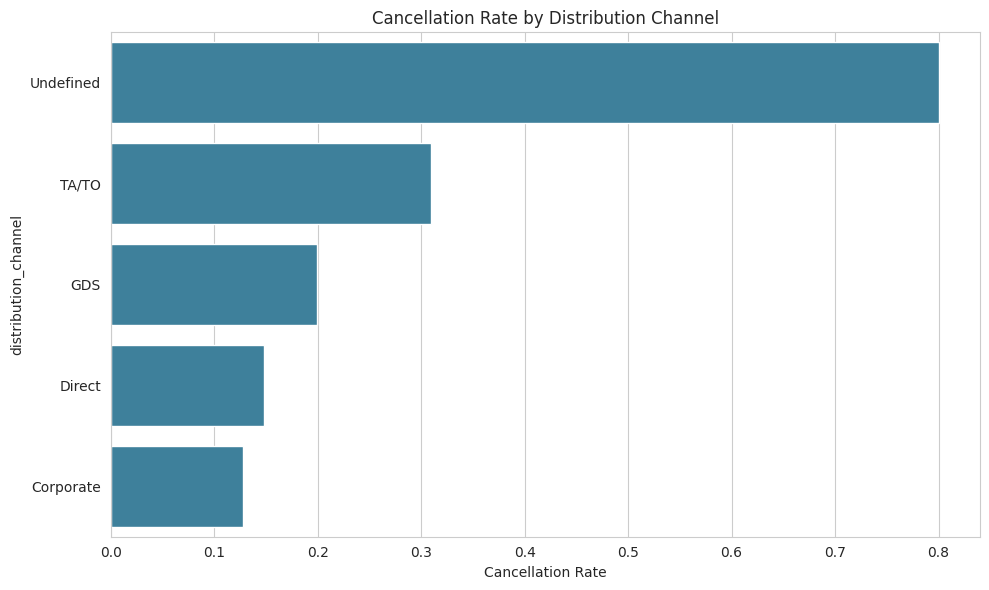

In [69]:
channel_cancellation = df.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=channel_cancellation.values, y=channel_cancellation.index)
plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Cancellation Rate')
plt.tight_layout()
plt.show()

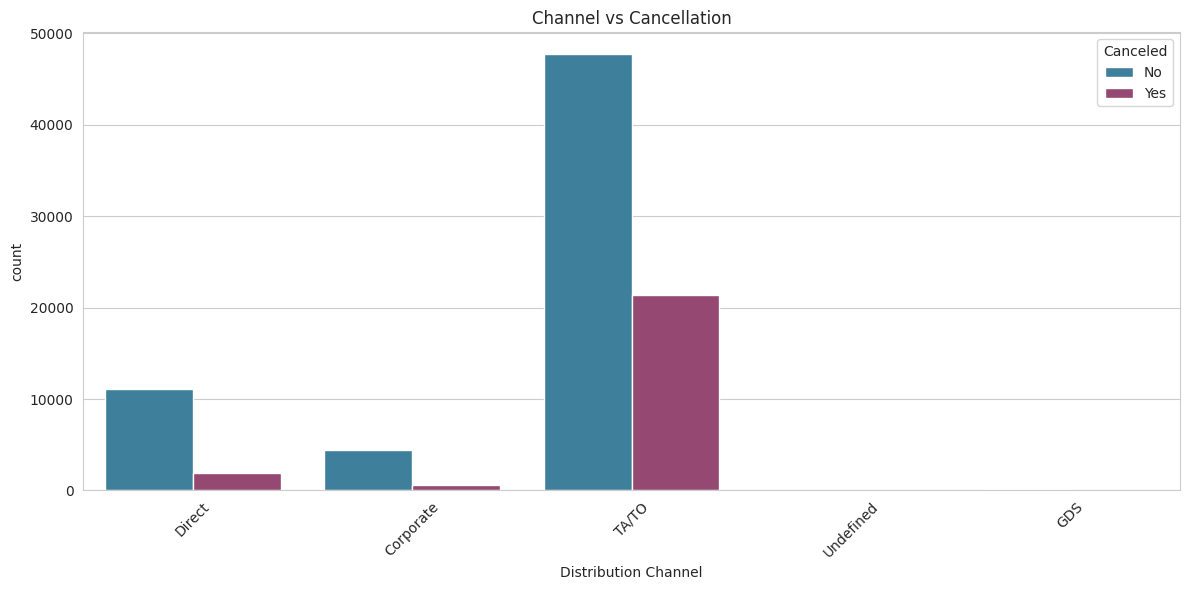

In [70]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='distribution_channel', hue='is_canceled')
plt.title('Channel vs Cancellation')
plt.xlabel('Distribution Channel')
plt.xticks(rotation=45)
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

### Customer Type and Loyalty Analysis

In [71]:
customer_type_counts = df['customer_type'].value_counts()
repeat_guest_rate = df['is_repeated_guest'].mean() * 100

In [72]:
customer_type_counts

,count
customer_type,
Transient,71972
Transient-Party,11721
Contract,3139
Group,544


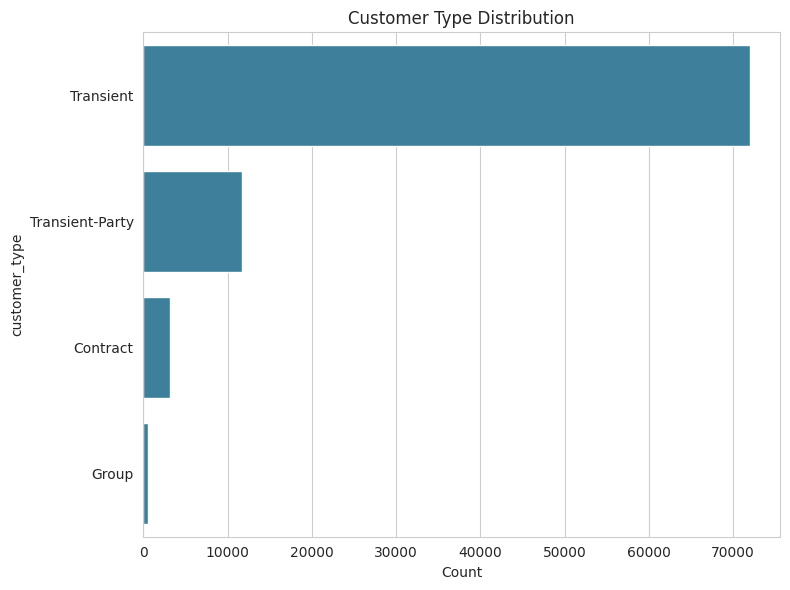

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='customer_type', order=customer_type_counts.index)
plt.title('Customer Type Distribution')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

Repeat Guest Rate: 3.91%


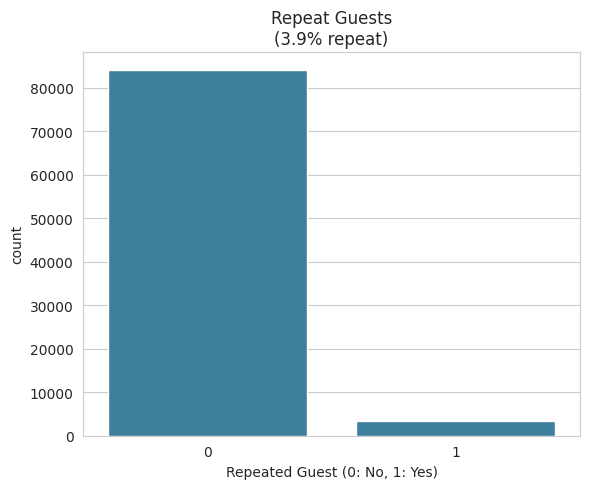

In [74]:
repeat_guest_rate = df['is_repeated_guest'].mean() * 100
print(f"Repeat Guest Rate: {repeat_guest_rate:.2f}%")

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='is_repeated_guest')
plt.title(f'Repeat Guests\n({repeat_guest_rate:.1f}% repeat)')
plt.xlabel('Repeated Guest (0: No, 1: Yes)')
plt.tight_layout()
plt.show()

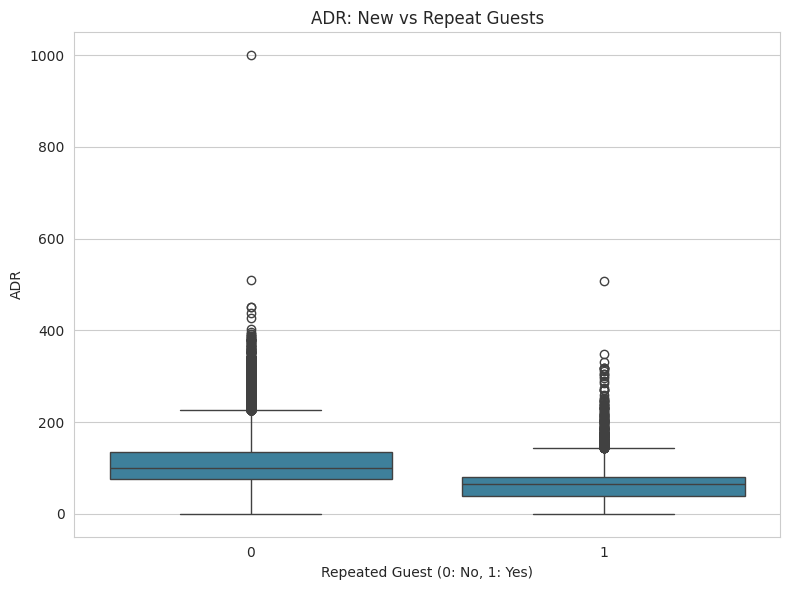

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='is_repeated_guest', y='adr')
plt.title('ADR: New vs Repeat Guests')
plt.xlabel('Repeated Guest (0: No, 1: Yes)')
plt.ylabel('ADR')
plt.tight_layout()
plt.show()

### Correlation Analysis

In [76]:
numerical_cols = ['lead_time', 'arrival_date_year', 'stays_in_weekend_nights',
                  'stays_in_week_nights', 'adults', 'children', 'babies',
                  'is_repeated_guest', 'previous_cancellations',
                  'previous_bookings_not_canceled', 'booking_changes',
                  'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                  'total_of_special_requests', 'is_canceled']

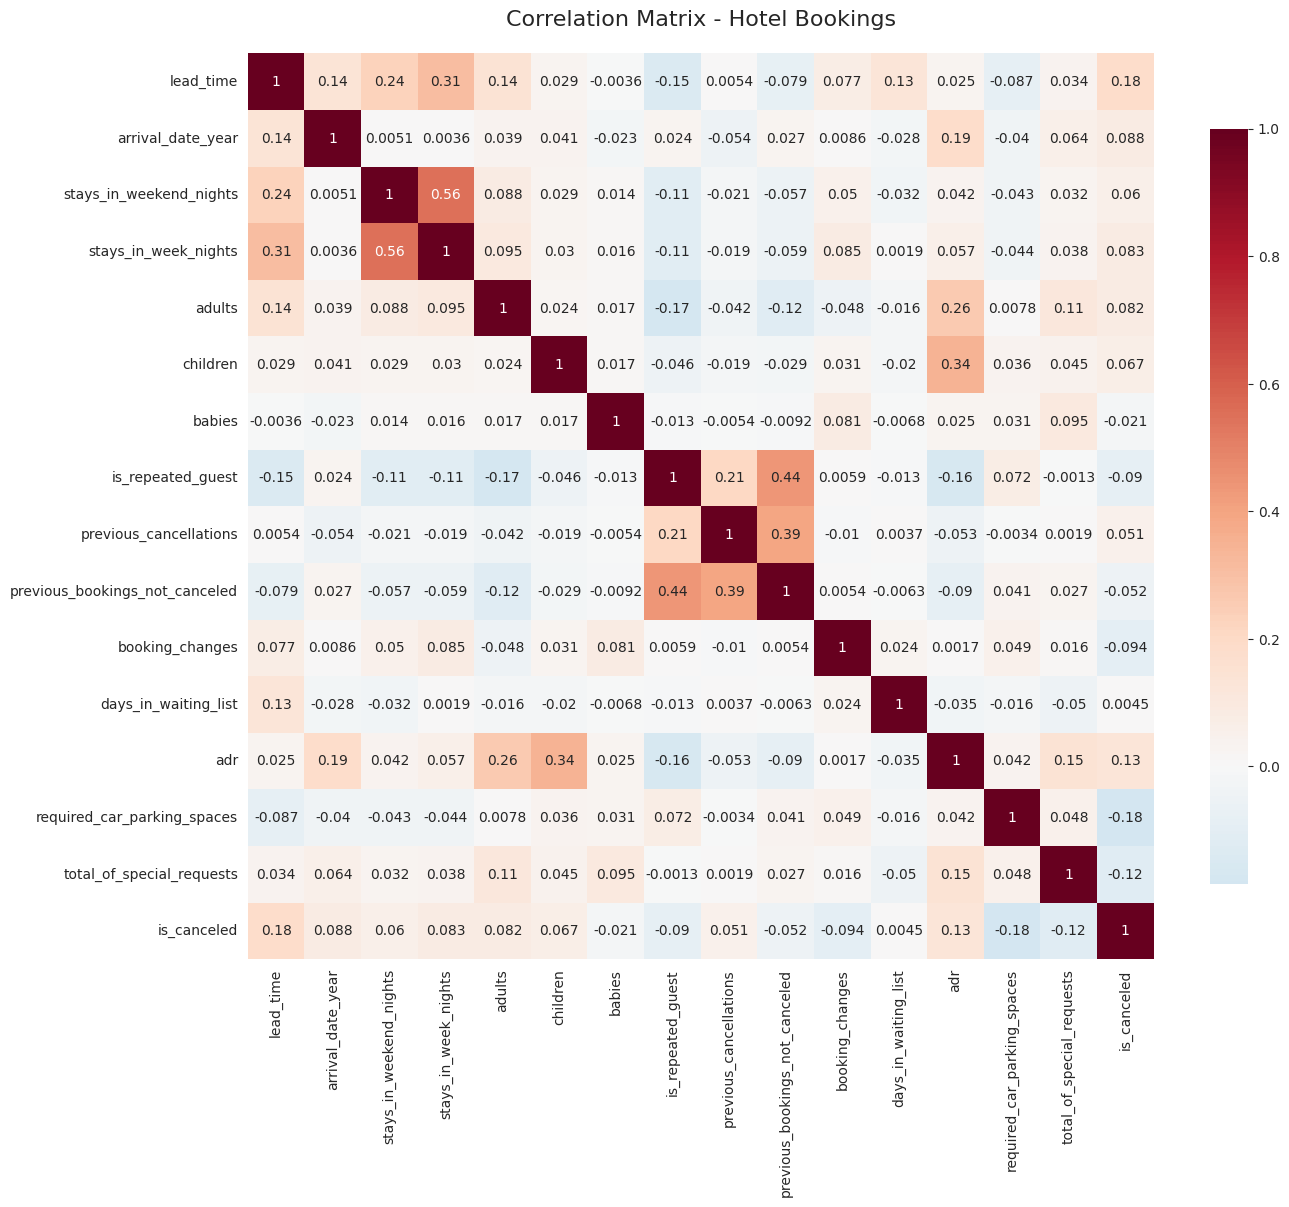

In [77]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            cbar_kws={'shrink': .8})
plt.title('Correlation Matrix - Hotel Bookings', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Feature engineering for enhanced model performance

In [78]:
# 1. Total guests
if all(col in df.columns for col in ['adults', 'children', 'babies']):
    df['total_guests'] = df['adults'] + df['children'] + df['babies']
    print("Created 'total_guests' = adults + children + babies")

Created 'total_guests' = adults + children + babies


In [79]:
# 2. Total nights
if all(col in df.columns for col in ['stays_in_weekend_nights', 'stays_in_week_nights']):
    df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    print("Created 'total_nights' = weekend_nights + week_nights")

Created 'total_nights' = weekend_nights + week_nights


In [80]:
# 3. Is family (binary flag)
if 'children' in df.columns and 'babies' in df.columns:
    df['is_family'] = ((df['children'] > 0) | (df['babies'] > 0)).astype(int)
    print("Created 'is_family' binary flag (1 if children or babies > 0)")

Created 'is_family' binary flag (1 if children or babies > 0)


## Data leakage removal

In [81]:
df.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True)

# Encode categorical variables for machine learning

In [82]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Found {len(categorical_columns)} categorical columns")

Found 10 categorical columns


In [83]:
low_cardinality_threshold = 10
low_cardinality_cols = []
high_cardinality_cols = []

for col in categorical_columns:
    unique_values = df[col].nunique()
    if unique_values <= low_cardinality_threshold:
        low_cardinality_cols.append(col)
    else:
        high_cardinality_cols.append(col)


In [84]:
print(f"Low-cardinality columns (≤{low_cardinality_threshold} unique values): {low_cardinality_cols}")
print(f"High-cardinality columns (>{low_cardinality_threshold} unique values): {high_cardinality_cols}")

Low-cardinality columns (≤10 unique values): ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
High-cardinality columns (>10 unique values): ['arrival_date_month', 'country', 'assigned_room_type']


In [85]:
if low_cardinality_cols:
    df_encoded = pd.get_dummies(df, columns=low_cardinality_cols, prefix=low_cardinality_cols)
    print(f"Applied One-Hot Encoding to {len(low_cardinality_cols)} columns")
else:
    df_encoded = df.copy()

Applied One-Hot Encoding to 7 columns


In [86]:
for col in high_cardinality_cols:
    if col in df_encoded.columns:
        freq_encoding = df_encoded[col].value_counts().to_dict()
        df_encoded[f'{col}_frequency'] = df_encoded[col].map(freq_encoding)

        value_counts = df_encoded[col].value_counts()
        frequent_categories = value_counts[value_counts >= 50].index.tolist()
        df_encoded[f'{col}_grouped'] = df_encoded[col].apply(
            lambda x: x if x in frequent_categories else 'Other'
        )

        print(f"{col}: Applied frequency encoding and grouped rare categories")

arrival_date_month: Applied frequency encoding and grouped rare categories
country: Applied frequency encoding and grouped rare categories
assigned_room_type: Applied frequency encoding and grouped rare categories


In [87]:
print(f"Final encoded dataset shape: {df_encoded.shape}")

Final encoded dataset shape: (87376, 70)


##Train-test split for model validation


In [88]:
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (69900, 69)
Testing set shape: (17476, 69)


## Save cleaned data for future use

In [89]:
df_encoded.to_csv("hotel_bookings_cleaned.csv", index=False)
print("Cleaned dataset saved as 'hotel_bookings_cleaned.csv'")

Cleaned dataset saved as 'hotel_bookings_cleaned.csv'


In [90]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Train/Test splits saved (X_train, X_test, y_train, y_test)")

Train/Test splits saved (X_train, X_test, y_train, y_test)
